In [1]:
import pandas as pd

df1 = pd.read_excel('datos (1) corregido.xlsx', skiprows=0)   
df1

,id,Entidadad federativa,01/01/2025_Desaparición forzada de personas_Delitos,01/01/2025_Desaparición forzada de personas_Victimas,01/01/2025_Desaparición de personas cometidas por particulares_Delitos,01/01/2025_Desaparición de personas cometidas por particulares_Victimas,01/02/2025_Desaparicion forzada de personas_Delitos,01/02/2025_Desaparicion forzada de personas_Victimas,01/02/2025_Desaparición de personas cometidas por particulares_Delitos,01/02/2025_Desaparición de personas cometidas por particulares_Victimas,01/03/2025_Desaparicion forzada de personas_Delitos,01/03/2025_Desaparicion forzada de personas_Victimas,01/03/2025_Desaparicion de personas cometidas por particulares_Delitos,01/03/2025_Desaparicion de personas cometidas por particulares_Victimas,2025_Desaparicion forzada de personas_Delitos,2025_Desaparicion forzada de personas_Victimas,2025_Desaparicion de personas cometidas por particulares_Delitos,2025_Desaparicion de personas cometidas por particulares_Victimas
0,1,Aguascalientes,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Baja California,1,1,5,13,0,0,14,30,2,9,8,15,3,10,27,58
2,3,Baja California Sur,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0
3,4,Campeche,0,0,1,2,0,0,2,4,0,0,0,0,0,0,3,6
4,5,Chiapas,1,2,26,29,1,1,11,12,0,0,14,15,2,3,51,56
5,6,Chihuahua,0,0,5,5,1,1,3,4,0,0,6,7,1,1,14,16
6,7,Ciudad de México,0,0,0,0,1,1,0,0,1,1,0,0,2,2,0,0
7,8,Coahuila,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9,Colima,1,1,24,24,0,0,41,41,1,1,33,33,2,2,98,98
9,10,Durango,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
forzada_delitos = df1[['Entidadad federativa', 
                       '01/01/2025_Desaparición forzada de personas_Delitos',
                       '01/02/2025_Desaparicion forzada de personas_Delitos',
                       '01/03/2025_Desaparicion forzada de personas_Delitos',
                       '01/03/2025_Desaparicion forzada de personas_Delitos',                     
                       ]]
forzada_delitos

,Entidadad federativa,01/01/2025_Desaparición forzada de personas_Delitos,01/02/2025_Desaparicion forzada de personas_Delitos,01/03/2025_Desaparicion forzada de personas_Delitos,01/03/2025_Desaparicion forzada de personas_Delitos
0,Aguascalientes,0,0,0,0
1,Baja California,1,0,2,2
2,Baja California Sur,0,0,1,1
3,Campeche,0,0,0,0
4,Chiapas,1,1,0,0
5,Chihuahua,0,1,0,0
6,Ciudad de México,0,1,1,1
7,Coahuila,0,0,0,0
8,Colima,1,0,1,1
9,Durango,0,0,0,0


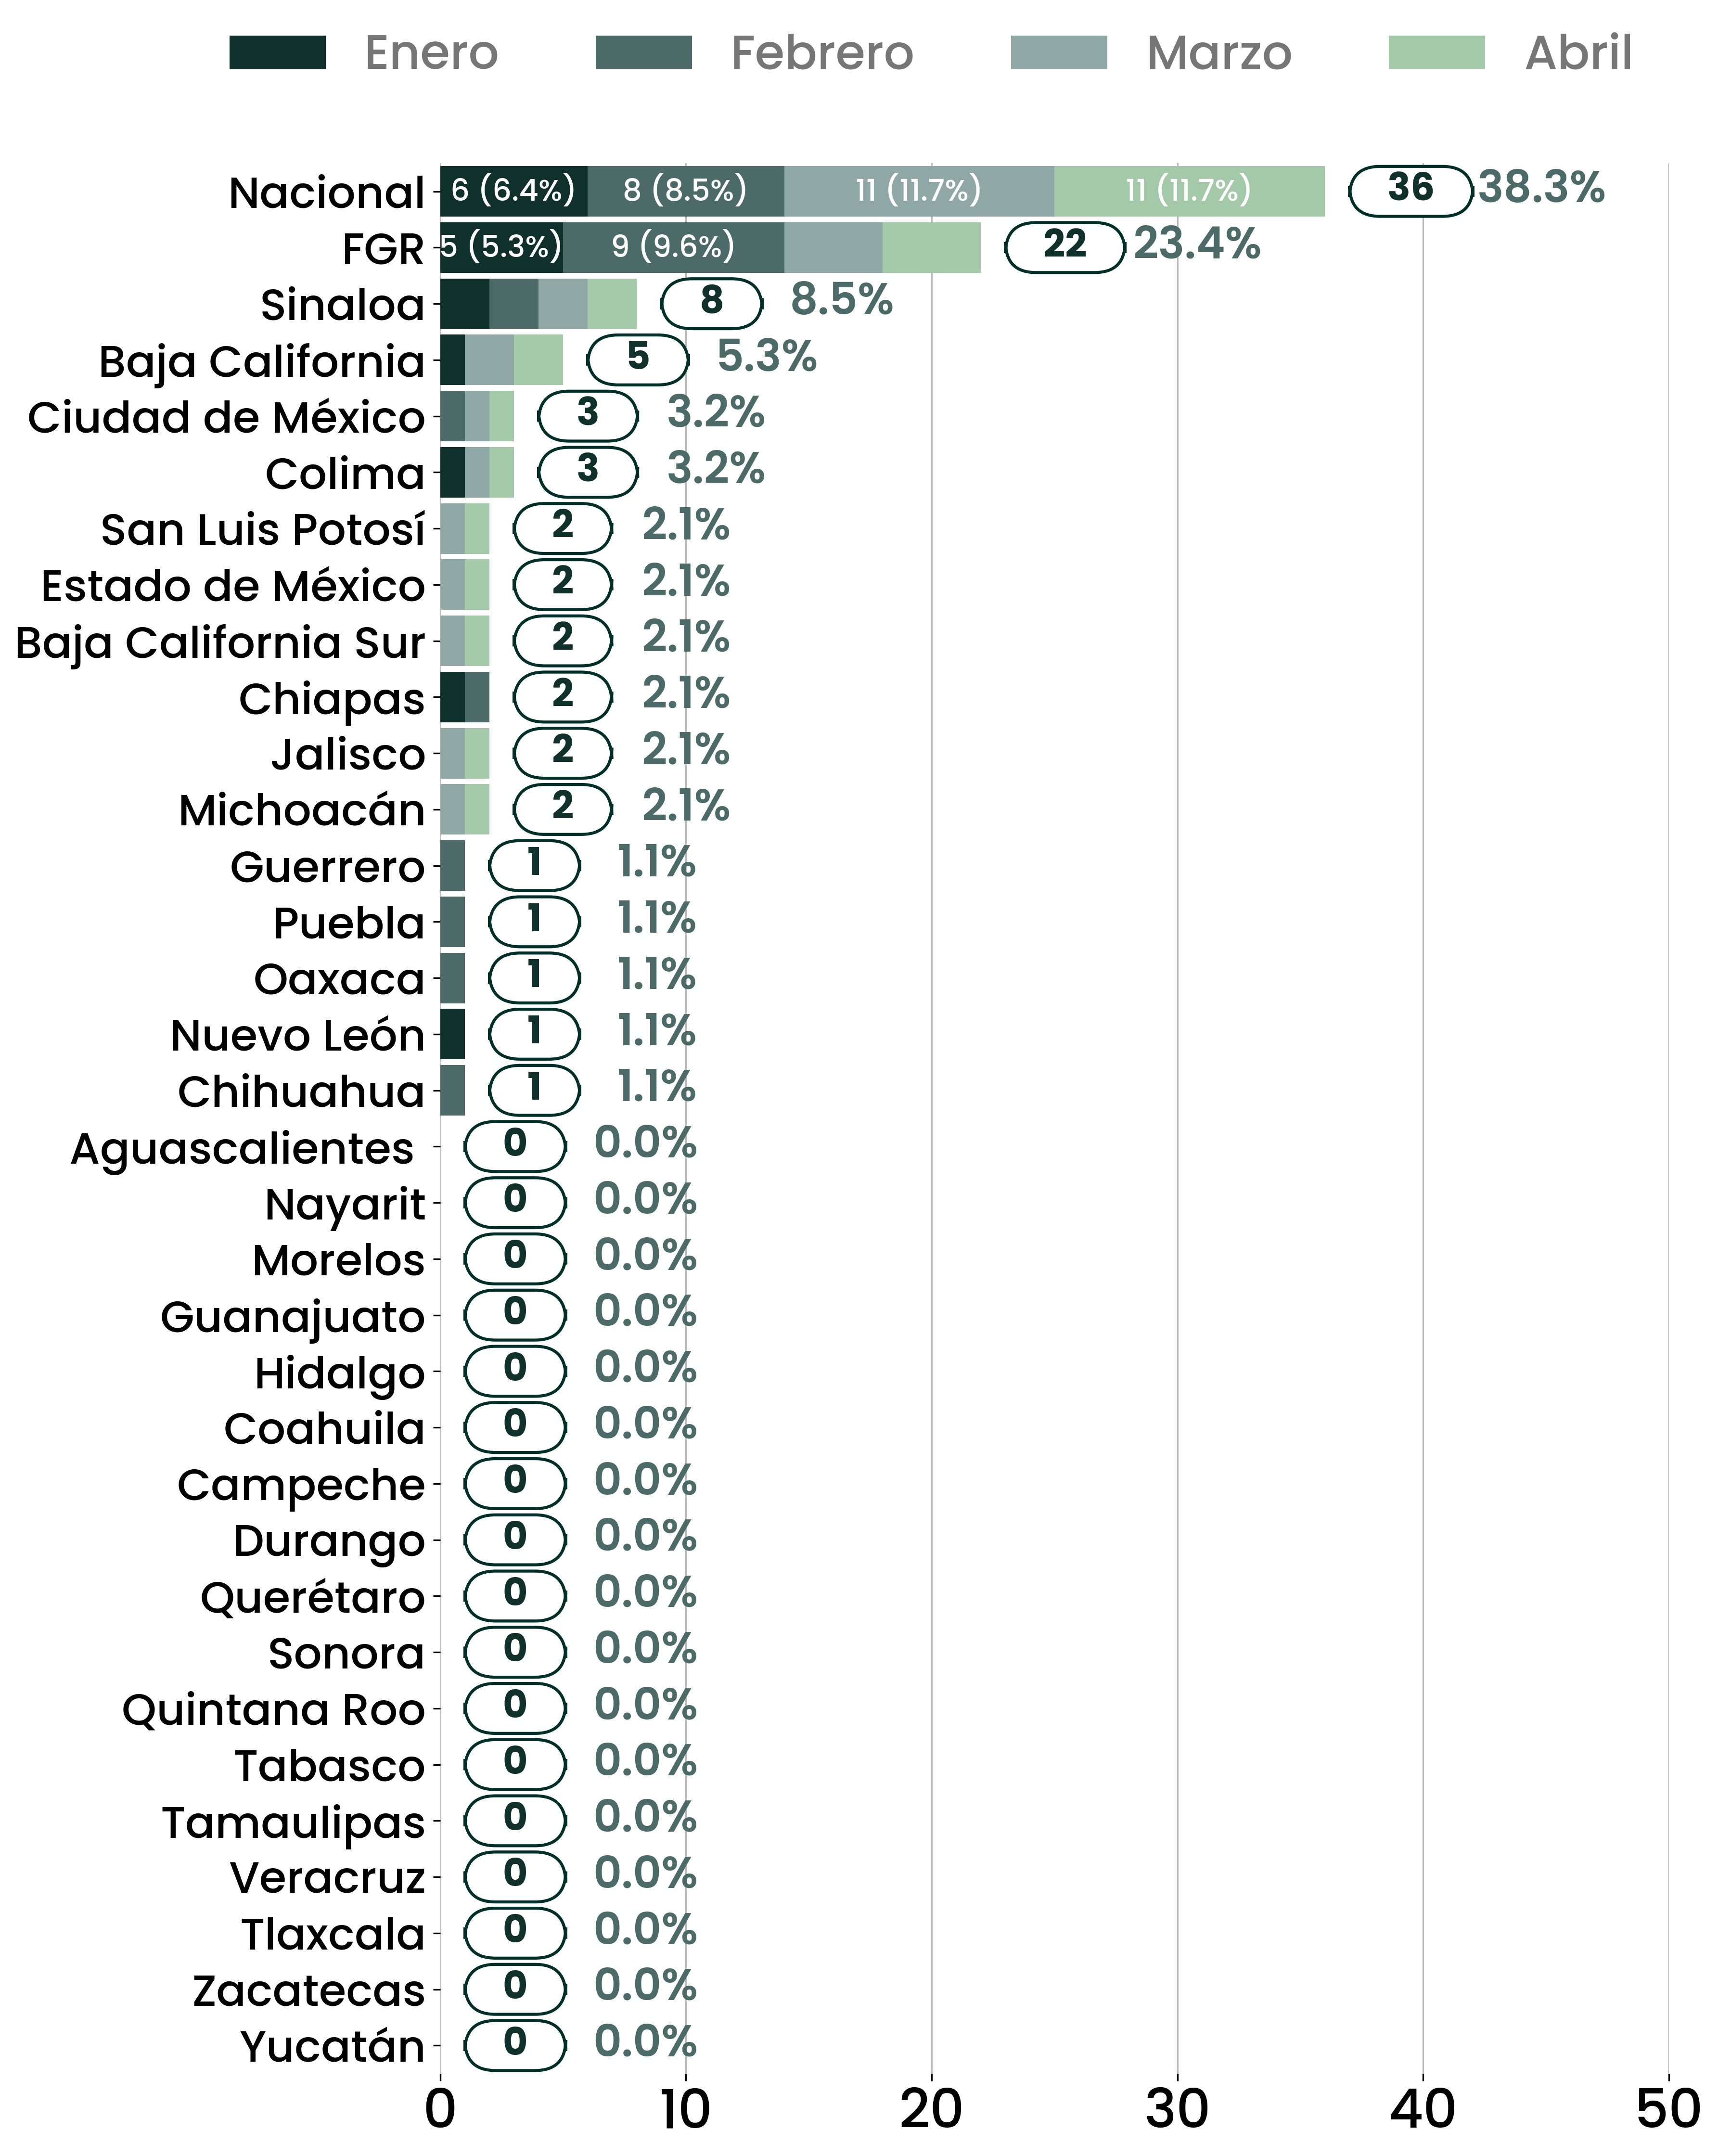

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from pathlib import Path

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("../0_fonts")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

leyenda = ['Enero', 'Febrero', 'Marzo', 'Abril']

def barras_apiladas_horizontales(df, bar_height=0.5, leyenda=None, nombre=None, porcentaje_barra=False, valor_barra=False, porcentaje_total=False):  
    if nombre: 
        nombre_df = nombre
    else:
        nombre_df = "barras_apiladas_horizontales"

    # Excluir la primera columna y convertir las demás a numéricas
    columnas_numericas = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    nombres_columnas = df.columns[1:]  # Nombres de las columnas numéricas

    font_config = {
        'family': 'Poppins',  # Arial, Poppins, Montserrat
        'variable_x': {'size': 27, 'weight': 'medium', 'color': '#000000'},
        'variable_y': {'size': 22, 'weight': 'medium', 'color': '#000000'},
        'valor_capsula': {'size': 19, 'weight': 'bold', 'color': '#10302C'}, 
        'valor_porcentaje_barra': {'size': 15, 'weight': 'medium', 'color': '#ffffff'}, 
        'porcentaje_total': {'size': 22, 'weight': 'semibold', 'color': '#4C6A67'}, 
        'leyenda': {'size': 24, 'weight': 'medium', 'color': '#767676'}
    }

    # Colores personalizados
    colores_asignados = ["#10302C", "#4C6A67", "#8FA8A6", "#A3C9A8"]

    # Calcular la suma total por categoría
    suma_total = columnas_numericas.sum(axis=1)
    total_general = suma_total.sum()

    # Ordenar las categorías de mayor a menor
    df = df.loc[suma_total.sort_values(ascending=False).index]
    columnas_numericas = columnas_numericas.loc[suma_total.sort_values(ascending=False).index]
    suma_total = suma_total.sort_values(ascending=False)  # Actualizar el orden de suma_total

    entidades = df.iloc[:, 0].values  # La primera columna contiene las etiquetas
    valores = [columnas_numericas.iloc[:, i].values for i in range(columnas_numericas.shape[1])]

    max_valor = suma_total.max()
    y_positions = np.arange(len(entidades))  # Asegurar que las posiciones sean correctas

    fig, ax = plt.subplots(figsize=(12, 15), dpi=300)
    fig.patch.set_facecolor('white')
    ax.set_facecolor('white')

    x_max = max_valor * 1.15

    # Dibujar barras apiladas
    for y_pos, entidad, total_valor in zip(y_positions, entidades, suma_total):
        left = 0
        for i, valor in enumerate(valores):
            label = leyenda[i] if leyenda and i < len(leyenda) and y_pos == 0 else None
            color = colores_asignados[i % len(colores_asignados)]  # Asignar colores personalizados
            ax.barh(y_pos, valor[y_pos], height=bar_height, left=left, color=color, edgecolor='none', zorder=2, label=label)

            # Mostrar porcentaje y/o valor dentro de las barras
            if porcentaje_barra or valor_barra:
                porcentaje_valor = (valor[y_pos] / total_general) * 100
                texto = ""
                if valor_barra:
                    texto += f"{valor[y_pos]:,.0f}"  # Agregar el valor numérico
                if porcentaje_barra:
                    if valor_barra:
                        texto += f" ({porcentaje_valor:.1f}%)"  # Agregar el porcentaje entre paréntesis
                    else:
                        texto += f"{porcentaje_valor:.1f}%"  # Agregar solo el porcentaje sin paréntesis

                # Crear un texto temporal en el eje para medir el ancho
                temp_text = ax.text(0, 0, texto,
                                    fontsize=font_config['valor_porcentaje_barra']['size'],
                                    fontfamily=font_config['family'],
                                    fontweight=font_config['valor_porcentaje_barra']['weight'],
                                    color=font_config['valor_porcentaje_barra']['color'],
                                    va='center', ha='center')
    
                # Dibujar la figura para asegurar que el renderer tenga el texto
                fig.canvas.draw_idle()  # Cambiar a draw_idle para asegurar renderizado

                # Obtener el bbox del texto en coordenadas de datos
                bbox = temp_text.get_window_extent(renderer=fig.canvas.get_renderer())
                bbox_data = ax.transData.inverted().transform_bbox(bbox)
                texto_width = bbox_data.width  # Ancho en unidades de datos
    
                temp_text.remove()  # Eliminar el texto temporal

                # Verificar si el texto cabe dentro de la barra
                if texto_width < valor[y_pos]*0.75:  # Mostrar solo si el texto cabe
                    ax.text(left + valor[y_pos] / 2, y_pos, texto,
                            va='center', ha='center',
                            fontsize=font_config['valor_porcentaje_barra']['size'],
                            fontfamily=font_config['family'],
                            fontweight=font_config['valor_porcentaje_barra']['weight'],
                            color=font_config['valor_porcentaje_barra']['color'])
            left += valor[y_pos]

        porcentaje = round((total_valor / total_general) * 100, 1)

        # Configurar estilo de la cápsula
        boxstyle = "round,pad=0.15,rounding_size=0.8"
        bbox_props = dict(
            boxstyle=boxstyle,
            facecolor='white',
            edgecolor='#002F2A',
            linewidth=1.5
        )

        # Dibujar cápsula con el total
        ax.text(
            total_valor + x_max * 0.03, y_pos, f"    {int(total_valor):,}    ",
            bbox=bbox_props,
            ha='left', va='center',
            fontsize=font_config['valor_capsula']['size'],
            fontfamily=font_config['family'],
            fontweight=font_config['valor_capsula']['weight'],
            color=font_config['valor_capsula']['color']
        )

        # Mostrar porcentaje total al lado derecho de la cápsula
        if porcentaje_total:
            ax.text(
                total_valor + x_max * 0.15, y_pos, f"{porcentaje}%",
                ha='left', va='center',
                fontsize=font_config['porcentaje_total']['size'],
                fontfamily=font_config['family'],
                fontweight=font_config['porcentaje_total']['weight'],
                color=font_config['porcentaje_total']['color']
            )

    # Asegurar que las etiquetas del eje Y estén alineadas con las barras
    ax.set_yticks(y_positions)
    ax.set_yticklabels(entidades,
                       fontsize=font_config['variable_y']['size'],
                       fontweight=font_config['variable_y']['weight'],
                       fontfamily=font_config['family']
                       )

    # Invertir el eje Y para que las etiquetas coincidan con las barras
    ax.invert_yaxis()

    ax.set_xlim(0, 1.1 * x_max)
    ax.set_ylim(len(entidades) - 0.5, -0.5)

    for spine in ax.spines.values():
        spine.set_visible(False)

    # Configurar las posiciones de los ticks en el eje X
    ax.set_xticks(ax.get_xticks())  # Asegurar que los ticks estén configurados

    # Configurar las etiquetas del eje X con propiedades avanzadas
    ax.set_xticklabels(
        [f"{int(tick):,}" for tick in ax.get_xticks()],  # Convertir los ticks a etiquetas formateadas si es necesario
        fontsize=font_config['variable_x']['size'],
        fontweight=font_config['variable_x']['weight'],
        fontfamily=font_config['family'],
        color=font_config['variable_x']['color']
        )

    ax.grid(visible=True, axis='x', color='#B9B9B9', linewidth=0.75, linestyle='-')

    # Crear una instancia de FontProperties para la leyenda
    leyenda_font = font_manager.FontProperties(
        family=font_config['family'],
        size=font_config['leyenda']['size'],
        weight=font_config['leyenda']['weight']
    )

    ax.legend(fontsize=font_config['leyenda']['size'], 
              loc='lower center', 
              bbox_to_anchor=(0.4, 1.02), 
              ncol=4, 
              frameon=False,
              prop=leyenda_font,
              labelcolor=font_config['leyenda']['color']              
              )

    plt.tight_layout()

    # Guardar la gráfica como archivo SVG y PNG usando el nombre del DataFrame
    plt.savefig(f"{nombre_df}.svg", format='svg', bbox_inches='tight', dpi=300)
    plt.savefig(f"{nombre_df}.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()
    
barras_apiladas_horizontales(forzada_delitos, nombre="forzada_delitos", bar_height=0.9, leyenda=leyenda, valor_barra=True, porcentaje_barra=True, porcentaje_total=True)